In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.metrics import confusion_matrix
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive (ajústala según tu ubicación específica)
file_path = '/content/drive/MyDrive/ceromero laptop /Maestria BI/Módulo 7 - Deep Learning/datasets/mc_donalds opiniones/McDonald_s_Reviews.csv'

# Cargar el dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reducir el número de filas analizadas al 20% del total
df = df.sample(frac=0.2, random_state=42)  # Tomar el 20% de las filas

# Mostrar las primeras filas del dataset
print(df.head())

# Inicializar el pipeline de análisis de sentimientos
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Aplicar análisis de sentimientos a la columna de texto (ajustar según el dataset)
def classify_sentiment(text):
    if pd.notnull(text):
        sentiment = sentiment_pipeline(text[:500])[0]['label']
        return int(sentiment[0]) - 1  # Convertir a rango 0-4
    return None

df['predicted_sentiment'] = df['review'].apply(classify_sentiment)



       reviewer_id  store_name              category  \
28477        28478  McDonald's  Fast food restaurant   
20807        20808  McDonald's  Fast food restaurant   
23801        23802  McDonald's  Fast food restaurant   
4534          4535  McDonald's  Fast food restaurant   
27250        27251  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
28477  5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...  28.333508   
20807  2400 Alliance Gateway Fwy, Fort Worth, TX 7617...  32.958041   
23801  1415 E State Rd, Fern Park, FL 32730, United S...  28.655350   
4534     724 Broadway, New York, NY 10003, United States  40.729126   
27250  10901 Riverside Dr, North Hollywood, CA 91602,...  34.152507   

        longitude rating_count  review_time  \
28477  -81.513738        5,567  2 years ago   
20807  -97.307652          957  2 years ago   
23801  -81.342692        1,617   a year ago   
4534   -73.993264        1,670  4 years ago   
2

Device set to use cuda:0


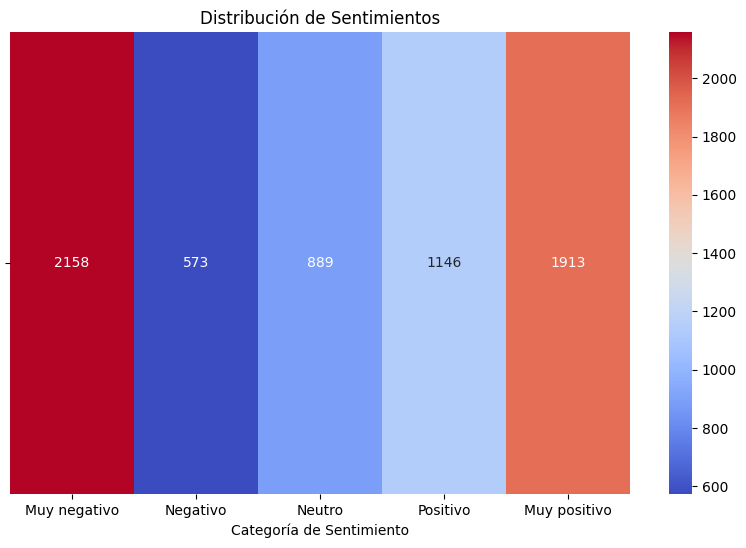

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sentiment_counts = df['predicted_sentiment'].value_counts().sort_index()
sentiment_labels = ["Muy negativo", "Negativo", "Neutro", "Positivo", "Muy positivo"]
sns.heatmap(sentiment_counts.values.reshape(1, -1), annot=True, fmt='d', cmap='coolwarm', xticklabels=sentiment_labels, yticklabels=[""])
plt.title("Distribución de Sentimientos")
plt.xlabel("Categoría de Sentimiento")
plt.show()




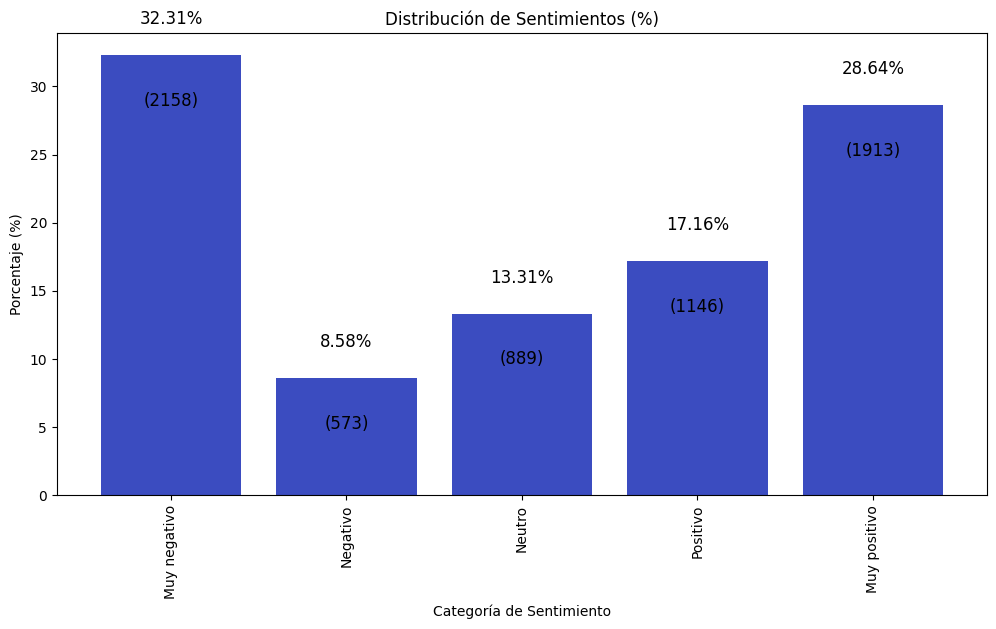

In [ ]:
# Crear el gráfico de distribución de sentimientos con tamaños proporcionales en barras
plt.figure(figsize=(12, 6))

# Calcular los porcentajes de distribución de los sentimientos
sentiment_counts = df['predicted_sentiment'].value_counts(normalize=True).sort_index() * 100
sentiment_frequencies = df['predicted_sentiment'].value_counts().sort_index()  # Cantidades absolutas

# Crear gráfico de barras con el mapa de colores 'coolwarm'
sentiment_counts.plot(kind='bar', colormap='coolwarm', width=0.8)

# Agregar porcentaje y cantidad a las barras
for i, (percent, freq) in enumerate(zip(sentiment_counts, sentiment_frequencies)):
    plt.text(i, percent + 2, f"{percent:.2f}%", ha='center', va='bottom', fontsize=12)
    plt.text(i, percent - 4, f"({freq})", ha='center', va='bottom', fontsize=12, color='black')

# Configuración del gráfico
plt.title("Distribución de Sentimientos (%)")
plt.xlabel("Categoría de Sentimiento")
plt.ylabel("Porcentaje (%)")
plt.xticks(ticks=np.arange(len(sentiment_counts)), labels=sentiment_labels)

plt.show()


